In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv")

In [3]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [7]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

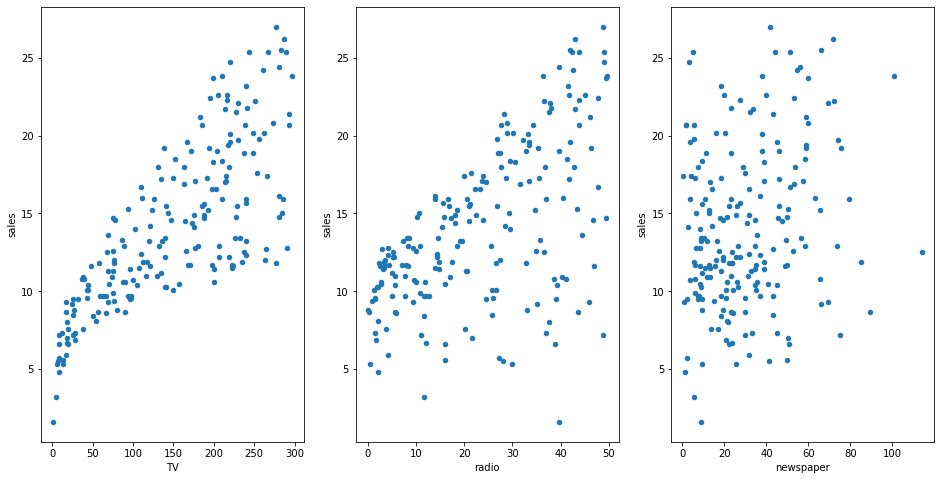

In [10]:
fig,axs=plt.subplots(1,3)
                
df.plot(kind="scatter",x="TV",y="sales",ax=axs[0],figsize=(16,8))
df.plot(kind="scatter",x="radio",y="sales",ax=axs[1])
df.plot(kind="scatter",x="newspaper",y="sales",ax=axs[2])        

In [11]:
df=df.drop(["Unnamed: 0"],axis=1)

In [12]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [13]:
df.shape

(200, 4)

In [14]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

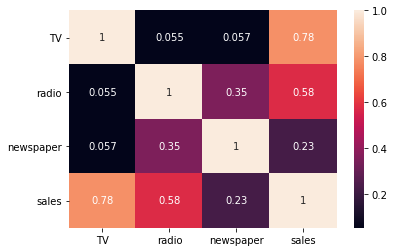

In [16]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

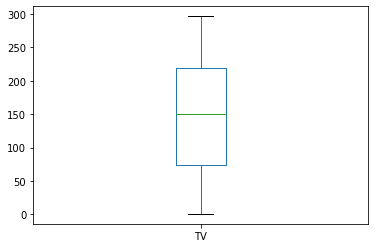

In [17]:
df["TV"].plot.box()

<AxesSubplot:>

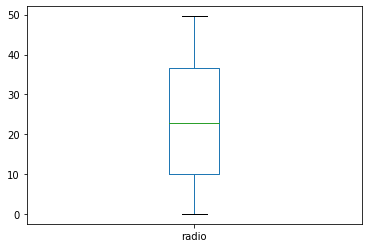

In [19]:
df["radio"].plot.box()

<AxesSubplot:>

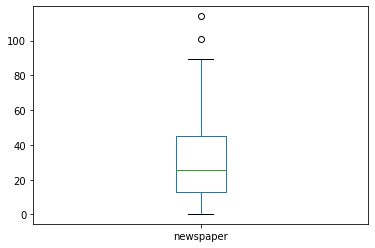

In [20]:
df["newspaper"].plot.box()

In [21]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

In [23]:
x=df.drop(columns=["sales"])
y=df["sales"]

In [24]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 9.69852266e-01,  9.81522472e-01,  1.77894547e+00],
       [-1.19737623e+00,  1.08280781e+00,  6.69578760e-01],
       [-1.51615499e+00,  1.52846331e+00,  1.78354865e+00],
       [ 5.20496822e-02,  1.21785493e+00,  1.28640506e+00],
       [ 3.94182198e-01, -8.41613655e-01,  1.28180188e+00],
       [-1.61540845e+00,  1.73103399e+00,  2.04592999e+00],
       [-1.04557682e+00,  6.43904671e-01, -3.24708413e-01],
       [-3.13436589e-01, -2.47406325e-01, -8.72486994e-01],
       [-1.61657614e+00, -1.42906863e+00, -1.36042422e+00],
       [ 6.16042873e-01, -1.39530685e+00, -4.30581584e-01],
       [-9.45155670e-01, -1.17923146e+00, -2.92486143e-01],
       [ 7.90028350e-01,  4.96973404e-02, -1.22232878e+00],
       [-1.43908760e+00,  7.99208859e-01,  1.62704048e+00],
       [-5.78501712e-01, -1.05768905e+00, -1.07502697e+00],
       [ 6.66253447e-01,  6.50657027e-01,  7.11007392e-01],
       [ 5.64664612e-01,  1.65000572e+00,  1.02862691e+00],
       [-9.25304978e-01,  9.00494200e-01

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score

lr=LinearRegression()
model=lr.fit(x_train,y_train)
y_pred=model.predict(x_test)
rmse=mean_squared_error(y_test, y_pred)**0.5
print("rmse=",rmse)
r2=r2_score(y_test, y_pred)
print("r2=",r2)
score=cross_val_score(model,x,y,cv=5,scoring="r2")
print("cv_score=",score)

rmse= 2.116440983250401
r2= 0.868283091262656
cv_score= [0.87865198 0.91763212 0.92933032 0.81443904 0.89547829]


In [32]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score
svr=SVR()
model=svr.fit(x_train,y_train)
y_pred=model.predict(x_test)
rmse=mean_squared_error(y_test, y_pred)**0.5
print("rmse=",rmse)
r2=r2_score(y_test, y_pred)
print("r2=",r2)
score=cross_val_score(model,x,y,cv=5,scoring="r2")
print("cv_score=",score)

rmse= 2.2794567475923206
r2= 0.8472110606261312
cv_score= [0.89985983 0.9464921  0.90928964 0.82899857 0.92371706]


In [33]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score
neigh = KNeighborsRegressor(n_neighbors=5)
model = neigh.fit(x_train,y_train)
y_pred=model.predict(x_test)
rmse=mean_squared_error(y_test, y_pred)**0.5
print("rmse=",rmse)
r2=r2_score(y_test, y_pred)
print("r2=",r2)
score=cross_val_score(model,x,y,cv=5,scoring="r2")
print("cv_score=",score)

rmse= 1.9617721580244736
r2= 0.8868312972751538
cv_score= [0.93979721 0.95178272 0.96532907 0.89134222 0.95581669]


In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score
rf=RandomForestRegressor(max_depth=2, random_state=0)
model=rf.fit(x_train,y_train)
y_pred=model.predict(x_test)
rmse=mean_squared_error(y_test, y_pred)**0.5
print("rmse=",rmse)
r2=r2_score(y_test, y_pred)
print("r2=",r2)
score=cross_val_score(model,x,y,cv=5,scoring="r2")
print("cv_score=",score)

rmse= 2.519725258380073
r2= 0.813303754952773
cv_score= [0.85944441 0.89932237 0.78180718 0.82561401 0.78039484]


In [35]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score
gbr = GradientBoostingRegressor(random_state=0)
model=gbr.fit(x_train,y_train)
y_pred=model.predict(x_test)
rmse=mean_squared_error(y_test, y_pred)**0.5
print("rmse=",rmse)
r2=r2_score(y_test, y_pred)
print("r2=",r2)
score=cross_val_score(model,x,y,cv=5,scoring="r2")
print("cv_score=",score)

rmse= 1.0854237886218985
r2= 0.9653560123317639
cv_score= [0.98166668 0.98692979 0.96637465 0.96691346 0.98703714]


In [68]:
from sklearn.model_selection import GridSearchCV
param_test1 = {'n_estimators':range(20,81,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.1, min_samples_split=50,min_samples_leaf=5,max_depth=4,random_state=10), 
param_grid = param_test1, scoring='r2', cv=10)
gsearch1.fit(x_train,y_train)


GridSearchCV(cv=10,
             estimator=GradientBoostingRegressor(max_depth=4,
                                                 min_samples_leaf=5,
                                                 min_samples_split=50,
                                                 random_state=10),
             param_grid={'n_estimators': range(20, 81, 10)}, scoring='r2')

In [69]:
tuned_model = gsearch1.best_estimator_

In [70]:
gsearch1.best_score_

0.9747445475585008

In [71]:
tuned_model.fit(x_train,y_train)
y_pred=tuned_model.predict(x_test)

In [72]:
y_pred

array([14.4765607 , 12.73399014, 12.7656415 , 13.51922844,  9.21705352,
       16.41319106, 21.75947881, 23.07759805, 16.9229278 , 14.78813287,
        6.87651322, 22.01233396, 10.74694321, 16.44661566, 15.54391758,
       19.34441053,  9.90740854, 12.77882997, 16.91930591, 16.3123399 ,
       10.42979442, 11.64697308, 18.12167217, 24.55519212,  9.56206203,
        6.40263097, 19.72126928,  7.44439891, 11.8383478 ,  6.55383127,
       13.25087186, 21.39233362, 16.2827579 , 10.80296531,  5.44196604,
       16.49166199, 23.20071238,  9.68608056, 11.67896596,  6.73518208])